In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/motor-vehicle-collision-and-crashes/Motor vehicle collision and crashes.csv')

/tmp/ipykernel_34/4157644766.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/motor-vehicle-collision-and-crashes/Motor vehicle collision and crashes.csv')


In [28]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [29]:
df.shape

(2081081, 29)

In [30]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           647518
ZIP CODE                          647769
LATITUDE                          234016
LONGITUDE                         234016
LOCATION                          234016
ON STREET NAME                    442197
CROSS STREET NAME                 787354
OFF STREET NAME                  1731257
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6837
CONTRIBUTING FACTOR VEHICLE 2     323067
CONTRIBUTING FACTOR VEHICLE 3    1932289
CONTRIBUTING FACTOR VEHICLE 4    2047465
CONTRIBUTING FACTOR VEHICLE 5    2071963
COLLISION_ID                           0
VEHICLE TYPE COD

:- By obeserving null values ,we have came to know that we have to drop some of the columns

**Dropping columns having more then 17lakhs as null values out of total 20l**

In [3]:
df = df.drop(columns=['OFF STREET NAME','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'])

In [32]:
df.duplicated().sum()

0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081081 entries, 0 to 2081080
Data columns (total 22 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   NUMBER OF PERSONS INJURED      float64
 10  NUMBER OF PERSONS KILLED       float64
 11  NUMBER OF PEDESTRIANS INJURED  int64  
 12  NUMBER OF PEDESTRIANS KILLED   int64  
 13  NUMBER OF CYCLIST INJURED      int64  
 14  NUMBER OF CYCLIST KILLED       int64  
 15  NUMBER OF MOTORIST INJURED     int64  
 16  NUMBER OF MOTORIST KILLED      int64  
 17  CONTRIBUTING FACTOR VEHICLE 1  object 
 18  CO

In [34]:
df.describe(include='object')

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
count,2081081,2081081,1433563,1433312.0,1847065,1638884,1293727,2074244,1758014,2067293,1682507
unique,4306,1440,5,427.0,283890,18440,20251,61,61,1642,1826
top,01/21/2014,16:00,BROOKLYN,11207.0,"(0.0, 0.0)",BROADWAY,3 AVENUE,Unspecified,Unspecified,Sedan,Sedan
freq,1161,28451,456115,20810.0,4386,17277,9843,708137,1480124,579207,405051


In [5]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       708137
Driver Inattention/Distraction    416641
Failure to Yield Right-of-Way     123693
Following Too Closely             111280
Backing Unsafely                   76893
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                79
Texting                               51
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64

In [62]:
# plt.figure(figsize=(20,10))
# sns.histplot(x=df['CONTRIBUTING FACTOR VEHICLE 1'],data=df)
# plt.xticks(rotation=90)

In [37]:
df.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          647518
ZIP CODE                         647769
LATITUDE                         234016
LONGITUDE                        234016
LOCATION                         234016
ON STREET NAME                   442197
CROSS STREET NAME                787354
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      6837
CONTRIBUTING FACTOR VEHICLE 2    323067
COLLISION_ID                          0
VEHICLE TYPE CODE 1               13788
VEHICLE TYPE CODE 2              398574
dtype: int64

In [72]:
df.shape

(2081081, 22)

In [4]:
df1 = df.copy()

In [5]:
# Drop rows containing any null values across all columns
df1 = df1.dropna()

In [8]:
df1.shape

(892884, 22)

In [52]:
# df1.corr()

In [78]:
df1.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
9,12/14/2021,14:58,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,0.0,...,0,0,0,0,0,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle
11,12/14/2021,16:50,QUEENS,11413.0,40.675884,-73.755770,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,...,0,0,0,0,0,Turning Improperly,Unspecified,4487127,Sedan,Station Wagon/Sport Utility Vehicle
14,12/14/2021,23:10,QUEENS,11434.0,40.666840,-73.789410,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,2.0,...,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,4486635,Sedan,Sedan
18,12/11/2021,19:43,BRONX,10463.0,40.872620,-73.904686,"(40.87262, -73.904686)",WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,...,0,0,0,1,0,Unspecified,Unspecified,4487040,Station Wagon/Sport Utility Vehicle,Sedan
24,12/13/2021,17:40,STATEN ISLAND,10301.0,40.631650,-74.087620,"(40.63165, -74.08762)",VICTORY BOULEVARD,WOODSTOCK AVENUE,1.0,...,0,0,0,1,0,Unspecified,Unspecified,4487001,Sedan,Sedan


# dropping more unnecessary columns

In [6]:
#dropping one more column from our data which is not useful for our problem
df1 = df1.drop(columns=['COLLISION_ID','LATITUDE','LONGITUDE','LOCATION'],axis=1)

  # checking value counts of our target column

In [10]:
df1['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                                              338591
Driver Inattention/Distraction                           164615
Failure to Yield Right-of-Way                             59527
Following Too Closely                                     31158
Other Vehicular                                           30363
Backing Unsafely                                          28965
Turning Improperly                                        25836
Fatigued/Drowsy                                           24686
Traffic Control Disregarded                               20825
Passing or Lane Usage Improper                            19391
Lost Consciousness                                        14618
Passing Too Closely                                       14133
Driver Inexperience                                       13897
Prescription Medication                                   12062
Unsafe Lane Changing                                      11922
Alcohol In

:- from above observation we can see that ,too many categories are present and highly imbalanced(as some categories are too high and some are too low)

 # CHECKING BOXPLOT AND HISTOGRAM OF OUR NUMERICAL COLUMNS

In [11]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# def plot_numerical_columns(df):
#     numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
    
#     # Plot histograms and boxplots side by side for each numerical column
#     fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(12, 6*len(numerical_columns)))
    
#     for i, column in enumerate(numerical_columns):
#         # Histogram plot
#         sns.histplot(df1[column], ax=axes[i, 0])
#         axes[i, 0].set_title(f'Histogram of {column}')
        
#         # Boxplot plot
#         sns.boxplot(x=df1[column], ax=axes[i, 1])
#         axes[i, 1].set_title(f'Boxplot of {column}')
        
#     plt.tight_layout()
#     plt.show()

# # Example usage:
# # Assuming 'df' is your DataFrame containing numerical columns
# plot_numerical_columns(df1)


:- NO signicant amount of outliers,and it is important for our model also ,so no need to drop

# CHECKING CATEGORICAL COLS

In [12]:
df_cat = df1.select_dtypes(include='object')

df_cat.head(1)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
9,12/14/2021,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle


**ZIP CODE**

In [13]:
len(df1['ZIP CODE'].unique())

388

In [14]:
# Checkig which zipcode has the maximum crash

# Group the data by 'zipcode' and count occurrences of crashes for each zipcode
zipcode_crash_counts = df1[df1['CONTRIBUTING FACTOR VEHICLE 1'].notnull()].groupby('ZIP CODE').size()

# Find the zipcode with the maximum number of crashes
max_crash_zipcode = zipcode_crash_counts.idxmax()
max_crash_count = zipcode_crash_counts.max()

print(f"The zipcode with the maximum number of crashes is {max_crash_zipcode} with {max_crash_count} crashes.")


The zipcode with the maximum number of crashes is 11207.0 with 11197 crashes.


:- So we cannot drop zipcode as it is showing how dangerous the area is

**BOROUGH**

In [15]:
df1['BOROUGH'].value_counts()

BOROUGH
BROOKLYN         277227
QUEENS           246679
MANHATTAN        210142
BRONX            119652
STATEN ISLAND     39184
Name: count, dtype: int64

**CONVERTING DATE TO DATETIME COLUMN AND TIME TO DATETIME**

In [7]:
df1['CRASH DATE'] = pd.to_datetime(df1['CRASH DATE'])


# creating a col which says is it a weekend or not
df1['is_weekend'] = df1['CRASH DATE'].dt.dayofweek.isin([5, 6])  # 5 represents Saturday, 6 represents Sunday


In [96]:
df1.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,is_weekend
9,2021-12-14,14:58,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,False
11,2021-12-14,16:50,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,False
14,2021-12-14,23:10,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,Sedan,Sedan,False
18,2021-12-11,19:43,BRONX,10463.0,WEST KINGSBRIDGE ROAD,HEATH AVENUE,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,True
24,2021-12-13,17:40,STATEN ISLAND,10301.0,VICTORY BOULEVARD,WOODSTOCK AVENUE,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Sedan,Sedan,False


**day or night**

In [8]:
# from crash time iam drafting one more column which says is it night or day


df1['CRASH TIME'] = pd.to_datetime(df1['CRASH TIME'])

# Extract the hour component
df1['hour'] = df1['CRASH TIME'].dt.hour

# Define a threshold (e.g., 18:00) to determine day and night
threshold = 18

# Create a new column indicating night (True) or day (False)
df1['is_night'] = df1['hour'] >= threshold


df1.drop(columns=['hour'],axis=1,inplace=True)

/tmp/ipykernel_34/2516075101.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['CRASH TIME'] = pd.to_datetime(df1['CRASH TIME'])


In [18]:
df1.head(2)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,is_weekend,is_night
9,2021-12-14,2024-04-22 14:58:00,MANHATTAN,10017.0,3 AVENUE,EAST 43 STREET,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,False,False
11,2021-12-14,2024-04-22 16:50:00,QUEENS,11413.0,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,False,False


In [9]:
df1.drop(columns=['CRASH DATE','CRASH TIME'],inplace=True,axis=1)

In [20]:
df1.shape

(892884, 18)

# Balancing data(capping)

In [107]:
df1['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                                              338591
Driver Inattention/Distraction                           164615
Failure to Yield Right-of-Way                             59527
Following Too Closely                                     31158
Other Vehicular                                           30363
Backing Unsafely                                          28965
Turning Improperly                                        25836
Fatigued/Drowsy                                           24686
Traffic Control Disregarded                               20825
Passing or Lane Usage Improper                            19391
Lost Consciousness                                        14618
Passing Too Closely                                       14133
Driver Inexperience                                       13897
Prescription Medication                                   12062
Unsafe Lane Changing                                      11922
Alcohol In

In [10]:
category_counts = df1['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()





# Identify categories with counts above 10,000
categories_above_threshold = category_counts[category_counts > 10000].index

# Reduce occurrences for these categories to at most 10,000
for category in categories_above_threshold:
    excess_rows = df1[df1['CONTRIBUTING FACTOR VEHICLE 1'] == category].sample(n=category_counts[category] - 10000, random_state=42)
    df1 = df1.drop(excess_rows.index)




# Clubbing the related categories together

In [30]:
df1['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Lost Consciousness                                       10000
Fatigued/Drowsy                                          10000
Driver Inexperience                                      10000
Unsafe Lane Changing                                     10000
Driver Inattention/Distraction                           10000
Failure to Yield Right-of-Way                            10000
Other Vehicular                                          10000
Backing Unsafely                                         10000
Turning Improperly                                       10000
Unspecified                                              10000
Passing or Lane Usage Improper                           10000
Following Too Closely                                    10000
Passing Too Closely                                      10000
Prescription Medication                                  10000
Traffic Control Disregarded                              10000
Alcohol Involvement      

In [11]:
df2 = df1.copy()

**Mapping (Clubbing)**

In [12]:
import pandas as pd

# Define the category mapping
category_mapping = {
    # Driver Impairments
    'Lost Consciousness': 'Driver Impairments',
    'Fatigued/Drowsy': 'Driver Impairments',
    'Fell Asleep': 'Driver Impairments',
    'Illness': 'Driver Impairments',
    'Illnes': 'Driver Impairments',
    'Alcohol Involvement': 'Driver Impairments',
    'Prescription Medication': 'Driver Impairments',
    'Drugs (Illegal)': 'Driver Impairments',
    'Drugs (illegal)': 'Driver Impairments',

    # Unsafe Driving Behaviors
    'Unsafe Lane Changing': 'Unsafe Driving Behaviors',
    'Failure to Yield Right-of-Way': 'Unsafe Driving Behaviors',
    'Turning Improperly': 'Unsafe Driving Behaviors',
    'Passing or Lane Usage Improper': 'Unsafe Driving Behaviors',
    'Following Too Closely': 'Unsafe Driving Behaviors',
    'Passing Too Closely': 'Unsafe Driving Behaviors',
    'Traffic Control Disregarded': 'Unsafe Driving Behaviors',
    'Aggressive Driving/Road Rage': 'Unsafe Driving Behaviors',
    'Unsafe Speed': 'Unsafe Driving Behaviors',
    'Failure to Keep Right': 'Unsafe Driving Behaviors',

    # Driver Distractions
    'Driver Inattention/Distraction': 'Driver Distractions',
    'Passenger Distraction': 'Driver Distractions',
    'Outside Car Distraction': 'Driver Distractions',
    'Other Electronic Device': 'Driver Distractions',
    'Cell Phone (hand-Held)': 'Driver Distractions',
    'Cell Phone (hands-free)': 'Driver Distractions',
    'Cell Phone (hand-held)': 'Driver Distractions',
    'Texting': 'Driver Distractions',
    'Eating or Drinking': 'Driver Distractions',
    'Listening/Using Headphones': 'Driver Distractions',
    'Using On Board Navigation Device': 'Driver Distractions',

    # Vehicle Defects
    'Brakes Defective': 'Vehicle Defects',
    'Steering Failure': 'Vehicle Defects',
    'Tire Failure/Inadequate': 'Vehicle Defects',
    'Accelerator Defective': 'Vehicle Defects',
    'Tow Hitch Defective': 'Vehicle Defects',
    'Headlights Defective': 'Vehicle Defects',
    'Other Lighting Defects': 'Vehicle Defects',
    'Tinted Windows': 'Vehicle Defects',
    'Windshield Inadequate': 'Vehicle Defects',
    'Vehicle Vandalism': 'Vehicle Defects',

    # Environmental Conditions
    'Pavement Slippery': 'Environmental Conditions',
    'Pavement Defective': 'Environmental Conditions',
    'View Obstructed/Limited': 'Environmental Conditions',
    'Reaction to Uninvolved Vehicle': 'Environmental Conditions',
    'Reaction to Other Uninvolved Vehicle': 'Environmental Conditions',
    'Obstruction/Debris': 'Environmental Conditions',
    'Glare': 'Environmental Conditions',
    'Animals Action': 'Environmental Conditions',

    # Traffic Issues
    'Traffic Control Device Improper/Non-Working': 'Traffic Issues',
    'Lane Marking Improper/Inadequate': 'Traffic Issues',
    'Oversized Vehicle': 'Traffic Issues',

    # Other Vehicular
    'Other Vehicular': 'Other Vehicular',
    'Driverless/Runaway Vehicle': 'Other Vehicular',  # <-- Fixed comma error
    
    # Miscellaneous
    'Backing Unsafely': 'Miscellaneous',
    'Unspecified': 'Miscellaneous',
    '80': 'Miscellaneous',

    # Human Factors
    'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'Human Factors',

    # Physical Disability
    'Physical Disability': 'Physical Disability',
    'Shoulders Defective/Improper': 'Physical Disability'
}

# Replace the original categories with the new grouped categories
df2['CONTRIBUTING FACTOR VEHICLE 1'] = df2['CONTRIBUTING FACTOR VEHICLE 1'].replace(category_mapping)

# Get the new value counts for the grouped categories
new_category_counts = df2['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

print(new_category_counts)


CONTRIBUTING FACTOR VEHICLE 1
Unsafe Driving Behaviors    83300
Driver Impairments          43603
Environmental Conditions    21662
Driver Distractions         21277
Miscellaneous               20004
Other Vehicular             10260
Driver Inexperience         10000
Traffic Issues               7278
Physical Disability          7179
Vehicle Defects              4972
Human Factors                2760
Name: count, dtype: int64


**Not used**

In [46]:
# import pandas as pd

# # Create the mapping dictionary for the clubbed groups
# category_mapping = {
#     # Driver Impairments
#     'Lost Consciousness': 'Driver Impairments',
#     'Fatigued/Drowsy': 'Driver Impairments',
#     'Fell Asleep': 'Driver Impairments',
#     'Illness': 'Driver Impairments',
#     'Alcohol Involvement': 'Driver Impairments',
#     'Prescription Medication': 'Driver Impairments',
#     'Drugs (Illegal)': 'Driver Impairments',
#     'Drugs (illegal)': 'Driver Impairments',

#     # Unsafe Driving Behaviors
#     'Unsafe Lane Changing': 'Unsafe Driving Behaviors',
#     'Failure to Yield Right-of-Way': 'Unsafe Driving Behaviors',
#     'Turning Improperly': 'Unsafe Driving Behaviors',
#     'Passing or Lane Usage Improper': 'Unsafe Driving Behaviors',
#     'Following Too Closely': 'Unsafe Driving Behaviors',
#     'Passing Too Closely': 'Unsafe Driving Behaviors',
#     'Traffic Control Disregarded': 'Unsafe Driving Behaviors',
#     'Aggressive Driving/Road Rage': 'Unsafe Driving Behaviors',
#     'Unsafe Speed': 'Unsafe Driving Behaviors',

#     # Driver Distractions
#     'Driver Inattention/Distraction': 'Driver Distractions',
#     'Passenger Distraction': 'Driver Distractions',
#     'Outside Car Distraction': 'Driver Distractions',
#     'Other Electronic Device': 'Driver Distractions',
#     'Cell Phone (hand-Held)': 'Driver Distractions',
#     'Cell Phone (hands-free)': 'Driver Distractions',
#     'Texting': 'Driver Distractions',
#     'Eating or Drinking': 'Driver Distractions',
#     'Listening/Using Headphones': 'Driver Distractions',
#     'Using On Board Navigation Device': 'Driver Distractions',

#     # Vehicle Defects
#     'Brakes Defective': 'Vehicle Defects',
#     'Steering Failure': 'Vehicle Defects',
#     'Tire Failure/Inadequate': 'Vehicle Defects',
#     'Accelerator Defective': 'Vehicle Defects',
#     'Tow Hitch Defective': 'Vehicle Defects',
#     'Headlights Defective': 'Vehicle Defects',
#     'Other Lighting Defects': 'Vehicle Defects',

#     # Environmental Conditions
#     'Pavement Slippery': 'Environmental Conditions',
#     'Pavement Defective': 'Environmental Conditions',
#     'View Obstructed/Limited': 'Environmental Conditions',
#     'Reaction to Uninvolved Vehicle': 'Environmental Conditions',
#     'Reaction to Other Uninvolved Vehicle': 'Environmental Conditions',
#     'Obstruction/Debris': 'Environmental Conditions',
#     'Glare': 'Environmental Conditions',
#     'Animals Action': 'Environmental Conditions',

#     # Traffic Issues
#     'Traffic Control Device Improper/Non-Working': 'Traffic Issues',
#     'Lane Marking Improper/Inadequate': 'Traffic Issues',
#     'Oversized Vehicle': 'Traffic Issues',

#     # Miscellaneous
#     'Backing Unsafely': 'Miscellaneous',
#     'Other Vehicular': 'Miscellaneous',
#     'Unspecified': 'Miscellaneous',
#     '80': 'Miscellaneous',

#     # Human Factors
#     'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'Human Factors',

#     # Physical Disability
#     'Physical Disability': 'Physical Disability',
#     'Illnes': 'Physical Disability',

#     # Vehicle Incidents
#     'Vehicle Vandalism': 'Vehicle Incidents',
#     'Driverless/Runaway Vehicle': 'Vehicle Incidents'
# }

# # Replace the original categories with new clubbed categories
# df2['CONTRIBUTING FACTOR VEHICLE 1'] = df2['CONTRIBUTING FACTOR VEHICLE 1'].replace(category_mapping)

# # Verify that the new categories are applied
# print(df2['CONTRIBUTING FACTOR VEHICLE 1'].value_counts())


In [13]:
## category percentages
category_counts = df2['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
total_entries = df2['CONTRIBUTING FACTOR VEHICLE 1'].count()

category_percentages = (category_counts / total_entries) * 100


print(category_percentages)


CONTRIBUTING FACTOR VEHICLE 1
Unsafe Driving Behaviors    35.859575
Driver Impairments          18.770529
Environmental Conditions     9.325211
Driver Distractions          9.159474
Miscellaneous                8.611464
Other Vehicular              4.416798
Driver Inexperience          4.304871
Traffic Issues               3.133085
Physical Disability          3.090467
Vehicle Defects              2.140382
Human Factors                1.188144
Name: count, dtype: float64


In [48]:
df2.head()

,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,is_weekend,is_night
14,QUEENS,11434.0,NORTH CONDUIT AVENUE,150 STREET,2.0,0.0,0,0,0,0,2,0,Environmental Conditions,Unspecified,Sedan,Sedan,False,True
45,BRONX,10452.0,BOSCOBEL PLACE,UNIVERSITY AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Impairments,Unspecified,Taxi,Station Wagon/Sport Utility Vehicle,True,True
51,MANHATTAN,10019.0,WEST 56 STREET,9 AVENUE,1.0,0.0,0,0,1,0,0,0,Environmental Conditions,Unspecified,Station Wagon/Sport Utility Vehicle,Bike,True,False
63,QUEENS,11418.0,JAMAICA AVENUE,102 STREET,0.0,0.0,0,0,0,0,0,0,Environmental Conditions,Unspecified,Ambulance,Station Wagon/Sport Utility Vehicle,True,True
93,BROOKLYN,11203.0,KINGS HIGHWAY,FARRAGUT ROAD,2.0,0.0,0,0,0,0,2,0,Unsafe Driving Behaviors,Traffic Control Disregarded,Sedan,Sedan,False,False


# Encoding categorical variables

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232295 entries, 14 to 2081070
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BOROUGH                        232295 non-null  object 
 1   ZIP CODE                       232295 non-null  object 
 2   ON STREET NAME                 232295 non-null  object 
 3   CROSS STREET NAME              232295 non-null  object 
 4   NUMBER OF PERSONS INJURED      232295 non-null  float64
 5   NUMBER OF PERSONS KILLED       232295 non-null  float64
 6   NUMBER OF PEDESTRIANS INJURED  232295 non-null  int64  
 7   NUMBER OF PEDESTRIANS KILLED   232295 non-null  int64  
 8   NUMBER OF CYCLIST INJURED      232295 non-null  int64  
 9   NUMBER OF CYCLIST KILLED       232295 non-null  int64  
 10  NUMBER OF MOTORIST INJURED     232295 non-null  int64  
 11  NUMBER OF MOTORIST KILLED      232295 non-null  int64  
 12  CONTRIBUTING FACTOR VEHICLE 1  23

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Loop through each object and boolean categorical column in the dataframe and apply label encoding
for column in df2.select_dtypes(include=['object', 'bool']).columns:
    # Convert to string to ensure uniformity
    df2[column] = df2[column].astype(str)
    df2[column] = label_encoder.fit_transform(df2[column])


In [55]:
df2.head()


,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,is_weekend,is_night
14,3,369,5539,373,2.0,0.0,0,0,0,0,2,0,3,54,261,321,0,1
45,0,131,2037,9000,0.0,0.0,0,0,0,0,0,0,1,54,291,327,1,1
51,2,36,7633,1355,1.0,0.0,0,0,1,0,0,0,3,54,268,38,1,0
63,3,343,4507,24,0.0,0.0,0,0,0,0,0,0,3,54,25,327,1,1
93,1,204,4657,4608,2.0,0.0,0,0,0,0,2,0,9,50,261,321,0,0


# Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

X = df2.drop('CONTRIBUTING FACTOR VEHICLE 1', axis=1)
y = df2['CONTRIBUTING FACTOR VEHICLE 1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)



In [16]:
x_copy = X.copy()

# Feature importances

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

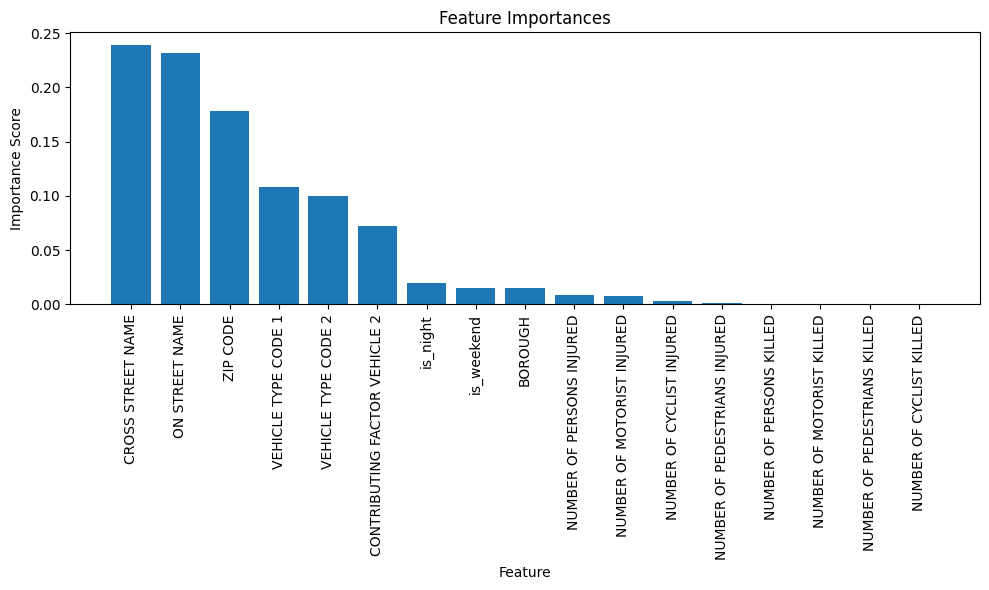

In [59]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_

# Create dummy feature names
feature_names = x_copy.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances with column names
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)  # Set column names as x-axis ticks
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

In [23]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
lgr = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()

models = [rfc, abc, gbc, etc, lgr, svc, dtc, xgb]
names = ["Random Forest", "Ada Boost", "Gradient Boosting",
        "Extra Trees", "Logistic Regression", "Support Vectors",
        "Decision Tree", "XGBoost"]

In [61]:
# def training(model, name, axes):
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
#     score = accuracy_score(y_test, pred)
#     report = classification_report(y_test, pred)
#     cm = confusion_matrix(y_test, pred)
#     sns.heatmap(cm, annot=True, ax=axes)
#     axes.set_title("{}: {}%".format(name, round(score*100, 2)))
#     return score*100, report

In [ ]:
# scores = []
# reports = dict()
# index = 0
# fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 7))
# for i in range(2):
#     for j in range(4):
#         score, report = training(models[index], names[index], axes[i][j])
#         scores += [score]
#         reports[names[index]] = report
#         index += 1
# plt.tight_layout()
# plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_lo

# XGBOOST 

In [18]:
  from xgboost import XGBClassifier

In [19]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  
    max_depth=6,       
    learning_rate=0.1,
    subsample=0.8,    
    colsample_bytree=0.8, 
    random_state=42   
)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:")
print(report)


Accuracy: 50.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.19      0.26      5278
           1       0.38      0.72      0.49     10755
           2       0.61      0.12      0.20      2514
           3       0.74      0.14      0.24      5410
           4       0.43      0.24      0.31       698
           5       0.35      0.05      0.08      4997
           6       0.59      0.44      0.50      2562
           7       0.57      0.16      0.25      1834
           8       0.56      0.11      0.19      1800
           9       0.59      0.82      0.68     20941
          10       0.65      0.02      0.05      1285

    accuracy                           0.50     58074
   macro avg       0.53      0.28      0.30     58074
weighted avg       0.52      0.50      0.44     58074



In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [6, 8, 10],     
    'learning_rate': [0.1, 0.05], 
    'subsample': [0.8, 1.0],     
    'colsample_bytree': [0.8, 1.0], 
    'gamma': [0, 0.1, 0.2],      
}


xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',random_state=42)

grid_search = GridSearchCV(
    xgb_classifier,
    param_grid,
    scoring='accuracy',  
    cv=3,                
    n_jobs=-1,           
    verbose=1           
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2%}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50,100,120],
    'max_depth': [None,4,5,8],
    
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=  18.7s
[CV] END ....................max_depth=None, n_estimators=50; total time=  18.9s
[CV] END ....................max_depth=None, n_estimators=50; total time=  19.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=  37.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=  37.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=  37.5s
[CV] END ...................max_depth=None, n_estimators=120; total time=  44.6s
[CV] END ...................max_depth=None, n_estimators=120; total time=  44.8s
[CV] END ...................max_depth=None, n_estimators=120; total time=  44.7s
[CV] END .......................max_depth=4, n_estimators=50; total time=   4.0s
[CV] END .......................max_depth=4, n_estimators=50; total time=   4.0s
[CV] END .......................max_depth=4, n_e

In [29]:
print(score)

0.4649585012225781
